# Tarea 4
## -Juan Andrés Páez 
## -Victor Flores 

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [156]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [157]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [159]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

-Según la descripción de variables dentro del dataframe, se obtiene que, las variables numericas son Weekly sales, Temperature, Fuel price, CPI y Unemploymet.


# Evalúe si la base contiene datos perdidos 


In [160]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

La base no contiene datos perdidos.

# Evalúe si alguna de las variables contiene datos atípicos (outliers) 

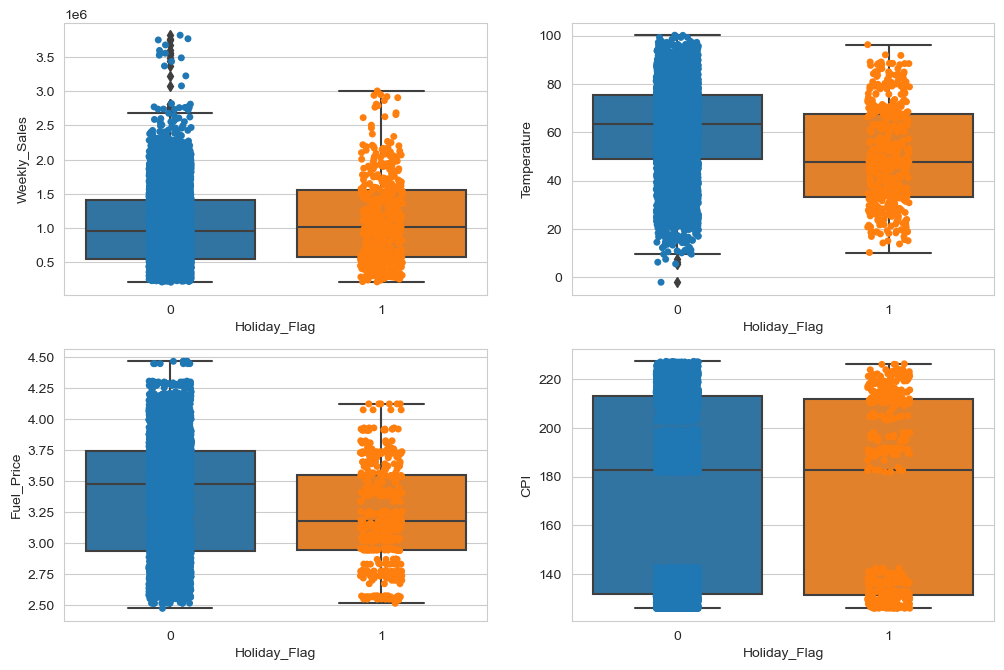

In [91]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
ax= sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Weekly_Sales',data=df)

plt.subplot(3,2,2) 
ax= sns.boxplot(x='Holiday_Flag',y='Temperature',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Temperature',data=df)

plt.subplot(3,2,3) 
ax= sns.boxplot(x='Holiday_Flag',y='Fuel_Price',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Fuel_Price',data=df)

plt.subplot(3,2,4) 
ax= sns.boxplot(x='Holiday_Flag',y='CPI',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='CPI',data=df)

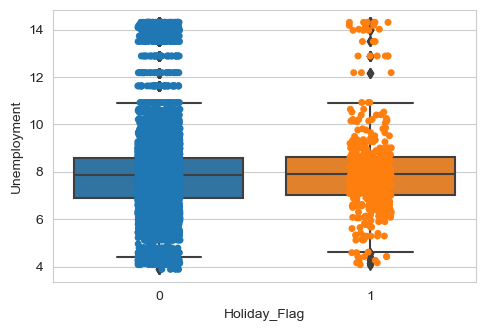

In [92]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
ax= sns.boxplot(x='Holiday_Flag',y='Unemployment',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Unemployment',data=df)

De acuerdo a lo observado en los diagramas de cajas, se puede identificar datos que salen de los cuartiles, por lo tanto, se identifican como atipicos, dentro de las variables numericas Weekly Sales, Temperature y Unemployment.

## Se procede a utilizar el rango intercuartil para la eliminacion de valores atipicos en las variables Weekly Sales, Temperature y Unemployment.

In [94]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) |(df['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]
df.shape

866808.5549999999


(6401, 8)

In [95]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Temperature.quantile(0.25)
Q3 = df.Temperature.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Temperature'] < (Q1 - 1.5 * IQR)) |(df['Temperature'] > (Q3 + 1.5 * IQR)))]
df.shape

27.340000000000003


(6398, 8)

In [96]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Unemployment.quantile(0.25)
Q3 = df.Unemployment.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Unemployment'] < (Q1 - 1.5 * IQR)) |(df['Unemployment'] > (Q3 + 1.5 * IQR)))]
df.shape

1.7309999999999999


(5917, 8)

## Verificación de eliminació de valores atípicos.

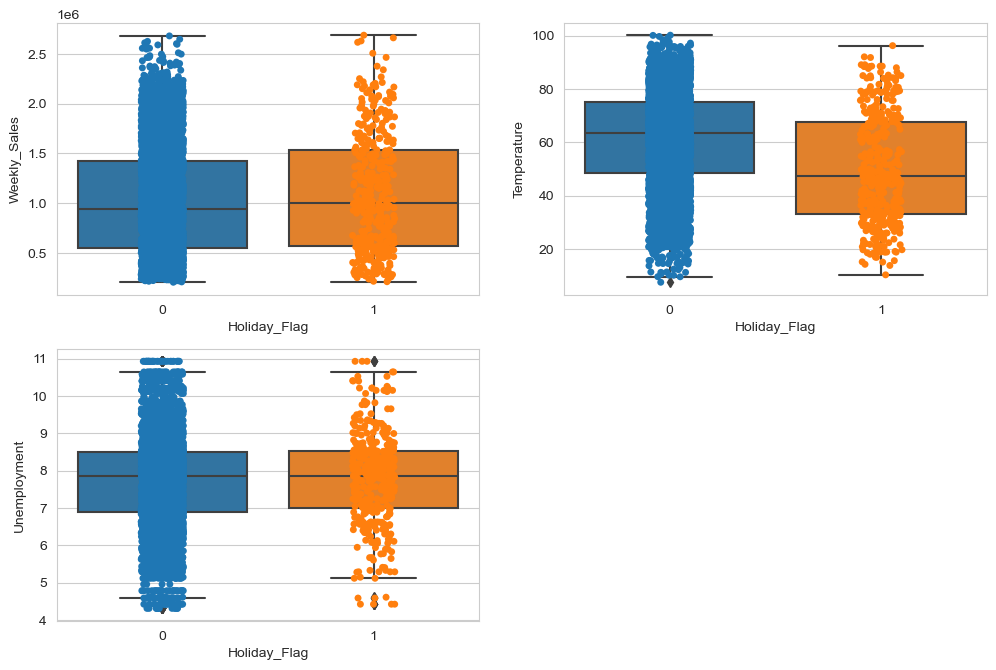

In [97]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
ax= sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Weekly_Sales',data=df)

plt.subplot(3,2,2) 
ax= sns.boxplot(x='Holiday_Flag',y='Temperature',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Temperature',data=df)

plt.subplot(3,2,3)
ax= sns.boxplot(x='Holiday_Flag',y='Unemployment',data=df)
ax = sns.stripplot(x='Holiday_Flag',y='Unemployment',data=df)

Las variables se encuentran mas aceptales. 

In [199]:
for i in df.select_dtypes(['object']).columns.difference(['modelo']):
    if df[i].dtype=='object':
        df[i].value_counts().plot(kind='bar', title=str(i))
        plt.show()

In [104]:
print("Sesgo de Weekly_Sales:", df['Weekly_Sales'].skew())
print("Sesgo de Temperature:", df['Temperature'].skew())
print("Sesgo de Fuel_Price:", df['Fuel_Price'].skew())
print("Sesgo de CPI:", df['CPI'].skew())
print("Sesgo de Unemployment:", df['Unemployment'].skew())


Sesgo de Weekly_Sales: 0.5031092228744799
Sesgo de Temperature: -0.35154869769214975
Sesgo de Fuel_Price: -0.0871283312387149
Sesgo de CPI: -0.09204138603781147
Sesgo de Unemployment: -0.0993326871740596


-Interpretamos el valor del sesgo de la siguiente manera:

 -Si el sesgo está entre -0,5 y 0,5, los datos son bastante simétricos.
 
 -Si el sesgo está entre -1 y - 0,5 o entre 0,5 y 1, los datos están moderadamente sesgados.
 
 -Si el sesgo es menor que -1 o mayor que 1, los datos están muy sesgados.

Text(0.5, 1.0, 'CPI')

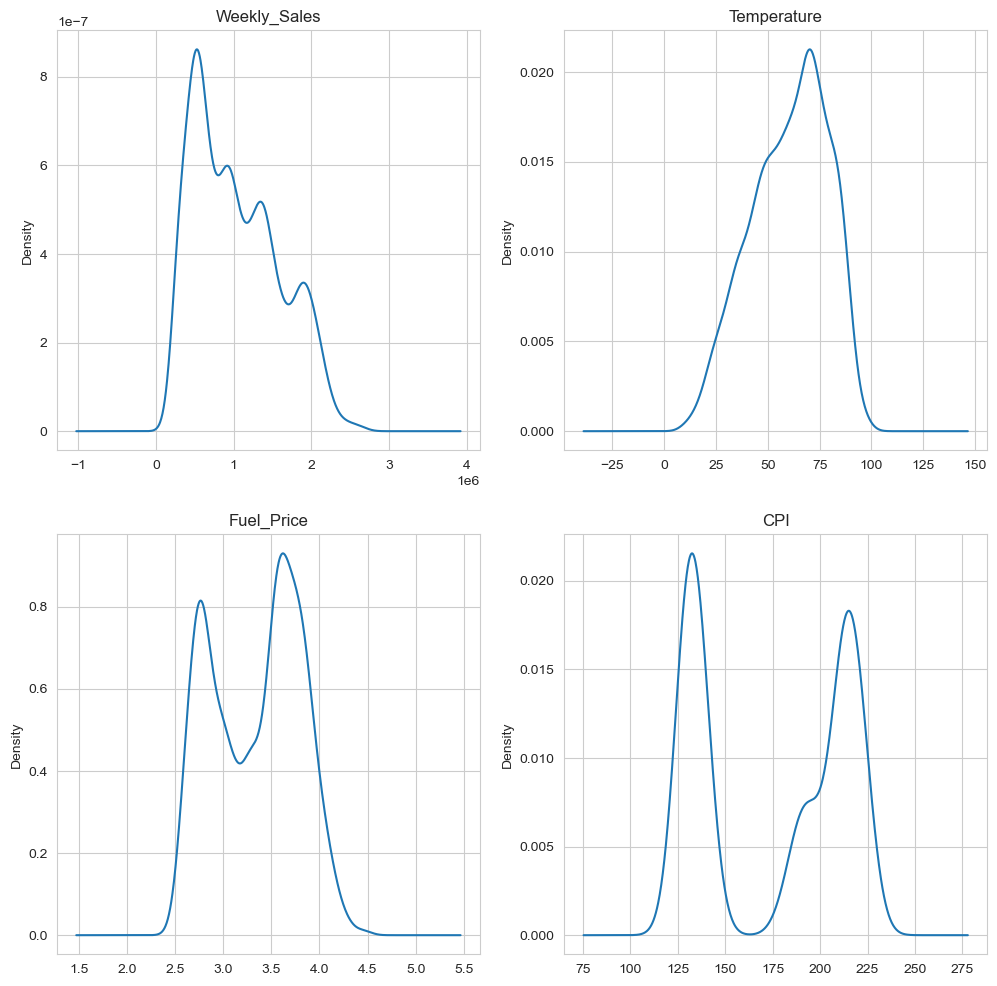

In [105]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')

plt.subplot(2,2,1)
df['Weekly_Sales'].plot.density()
plt.title("Weekly_Sales")

plt.subplot(2,2,2)
df['Temperature'].plot.density()
plt.title("Temperature")

plt.subplot(2,2,3)
df['Fuel_Price'].plot.density()
plt.title("Fuel_Price")

plt.subplot(2,2,4)
df['CPI'].plot.density()
plt.title("CPI")

Text(0.5, 1.0, 'Unemployment')

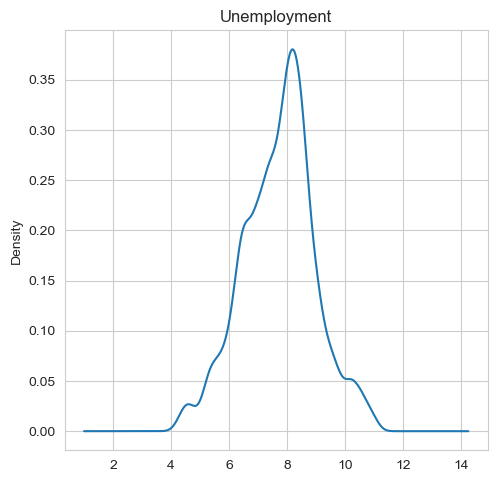

In [106]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')

plt.subplot(2,2,1)
df['Unemployment'].plot.density()
plt.title("Unemployment")

Las variables numericas identifican datos bastantes simetricos, a excepcion de Weekly Sales que llega a tener un sesgo de 0.503 que de todas maneras se considera como un rango simetrico.

# Obtenga las correlaciones entre los datos de corte numérico. 

In [107]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.003801,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Date,0.003801,1.000000,-0.030750,0.040931,0.037760,0.027605,0.004175,0.000201
Weekly_Sales,-0.319354,-0.030750,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
Holiday_Flag,0.004289,0.040931,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperature,-0.027045,0.037760,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
Fuel_Price,0.047519,0.027605,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
CPI,-0.208637,0.004175,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Unemployment,0.309645,0.000201,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


In [108]:
df.corr().style.background_gradient(cmap='coolwarm')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.003801,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Date,0.003801,1.000000,-0.030750,0.040931,0.037760,0.027605,0.004175,0.000201
Weekly_Sales,-0.319354,-0.030750,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
Holiday_Flag,0.004289,0.040931,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperature,-0.027045,0.037760,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
Fuel_Price,0.047519,0.027605,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
CPI,-0.208637,0.004175,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Unemployment,0.309645,0.000201,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


# Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

In [109]:
from sklearn.linear_model import LinearRegression

In [161]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
labelencoder = LabelEncoder()

In [164]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [165]:
X = df[df.columns.difference(['CPI'])]
y = df.CPI

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)

In [168]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5148, 7)  <class 'pandas.core.frame.DataFrame'>
(5148,) 	  <class 'pandas.core.series.Series'>
(1287, 7)  <class 'pandas.core.frame.DataFrame'>
(1287,) 	  <class 'pandas.core.series.Series'>


# Modelo de Regresión Lineal por Sklearn

In [169]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [170]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

# Métricas de Evaluación 

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## MSE

In [172]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

1221.0881667186363
1196.0750736915188


## RMSE

In [173]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

34.94407198250708
34.584318320468874


In [174]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

31.408897229854396
30.892740445329196


## R^2

In [175]:
from sklearn.metrics import r2_score

In [176]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.2105941357458725
El R^2 del subconjunto de prueba es: 0.23115184968228975


In [177]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_) 

intercepto: 273.43151530624846
pendiente: [-5.89714038e-03 -1.67503536e+01  4.62861358e+00 -5.52532197e-01
  4.79294835e-01 -6.40578565e+00 -1.02394425e-05]


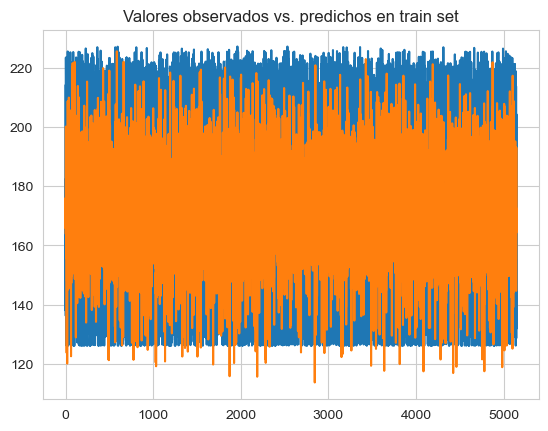

In [178]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

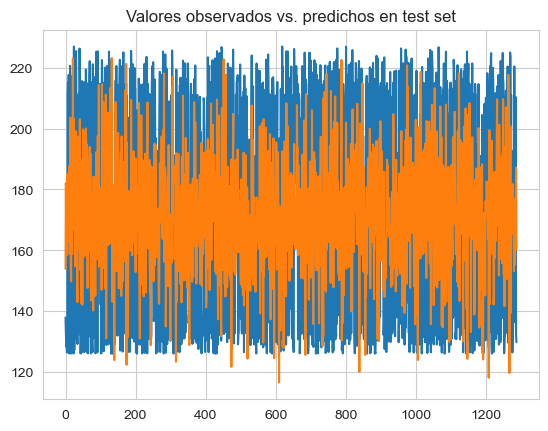

In [179]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

# Bonus: Feature importance

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
sc = StandardScaler()

In [182]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [183]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [184]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

## R^2

In [185]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.2105941357458725
El R^2 del subconjunto de prueba es: 0.23115184968148794


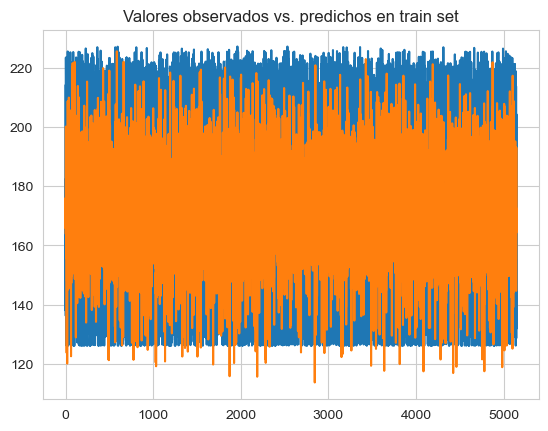

In [186]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

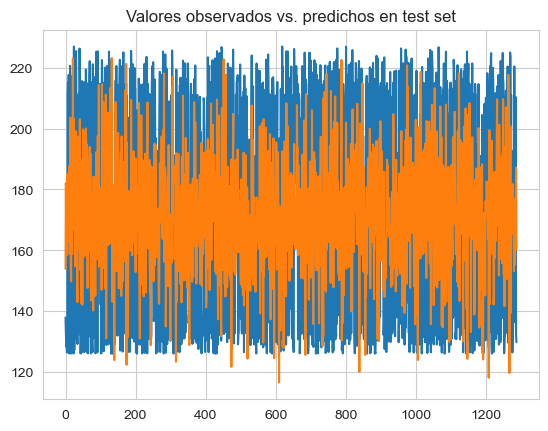

In [187]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

In [188]:
importancia = modelo_regresion_std.coef_

In [189]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -0.24247
Variable explicativa No. 1, Score: -7.66307
Variable explicativa No. 2, Score: 1.18195
Variable explicativa No. 3, Score: -7.18108
Variable explicativa No. 4, Score: 8.91604
Variable explicativa No. 5, Score: -11.97672
Variable explicativa No. 6, Score: -5.76780


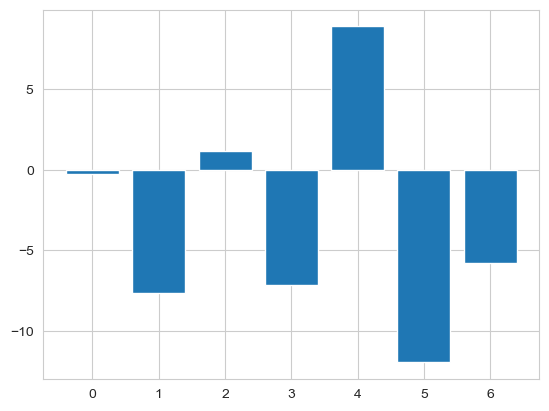

In [190]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

Un valor de "feature importance" negativo significa que esa característica hace que aumente la función de costos, por lo que el modelo no está hace un buen uso de esa característica.

Las variables con un alto poder expliativo son Holiday_Flag y Flue_Price